In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
#Importing the dataset
%%bigquery df --project trans-falcon-383013
SELECT 
  *
FROM `trans-falcon-383013.project.admission_rate`

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
df

,year,facility_type_a,sex,age,rate
0,2010,Acute,Male,0-14 Years,104.3
1,2010,Psychiatric Hospitals,Male,0-14 Years,0.2
2,2010,Community Hospitals,Male,0-14 Years,0.0
3,2011,Acute,Male,0-14 Years,111.6
4,2011,Psychiatric Hospitals,Male,0-14 Years,0.1
...,...,...,...,...,...
193,2019,Psychiatric Hospitals,Female,65 years & over,1.5
194,2019,Community Hospitals,Female,65 years & over,27.9
195,2020,Acute,Female,65 years & over,273.6
196,2020,Psychiatric Hospitals,Female,65 years & over,1.3


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

filtered_df = df.loc[(df['facility_type_a'] == "Acute") & (df['year'] < 2020)]
#filtered_df = df.loc[df['facility_type_a'] == "Acute"]
grouped_df = filtered_df.groupby(['year'])['rate'].sum().reset_index()
print(grouped_df)

   year    rate
0  2010   965.2
1  2011  1001.5
2  2012  1015.2
3  2013  1016.8
4  2014  1034.5
5  2015  1032.6
6  2016  1114.5
7  2017  1130.3
8  2018  1131.1
9  2019  1160.9


In [ ]:
# Assuming you have a pandas DataFrame called 'df' containing the data you provided
X = grouped_df[['year']] # Features
y = grouped_df['rate'] # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a linear regression model and fit it to the training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Predict the number of doctors for a given year
year = [[2023]]
predicted_num_doctors = regressor.predict(year)
print("Predicted number of doctors for 2023:", predicted_num_doctors[0])


Mean Squared Error: 69.35055435981663
R-squared: 0.9793489063390857
Predicted number of doctors for 2023: 1246.5900195694703


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


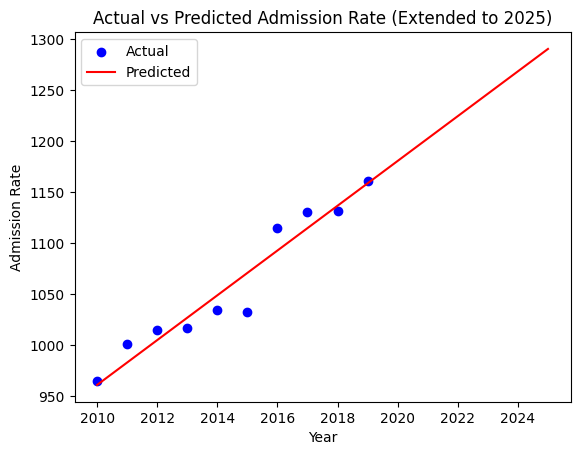

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create an extended range of financial years until 2025
extended_years = np.arange(2010, 2026).reshape(-1, 1)

# Predict the government health expenditure for the extended range
y_pred_extended = regressor.predict(extended_years)

# Plot the actual values
plt.scatter(X, y, color='blue', label='Actual')

# Plot the predicted line
plt.plot(extended_years, y_pred_extended, color='red', label='Predicted')

# Add labels and a legend
plt.xlabel('Year')
plt.ylabel('Admission Rate')
plt.legend()
plt.title('Actual vs Predicted Admission Rate (Extended to 2025)')

# Show the plot
plt.show()